In [7]:
import os
import json
import pandas as pd

# Check Scraping


In [1]:
# Check for the same number of image and json files
for CPC in os.listdir('/vast/marco/Data_Google_Patent/json/query'):
    json_path = os.listdir(f'/vast/marco/Data_Google_Patent/json/query/{CPC}')
    front_img_path = os.listdir(f'/vast/marco/Data_Google_Patent/front_imgs/query/{CPC}')
    print(f'Text: {len(json_path)}\t Image: {len(front_img_path)}\t CPC: {CPC}\t Type: query')

print('-----------------------------------------------------------')

for CPC in os.listdir('/vast/marco/Data_Google_Patent/json/document'):
    json_path = os.listdir(f'/vast/marco/Data_Google_Patent/json/document/{CPC}')
    front_img_path = os.listdir(f'/vast/marco/Data_Google_Patent/front_imgs/document/{CPC}')
    print(f'Text: {len(json_path)}\t Image: {len(front_img_path)}\t CPC: {CPC}\t Type: document')


Text: 155	 Image: 155	 CPC: A42B3	 Type: query
Text: 76	 Image: 76	 CPC: A62B18	 Type: query
Text: 40	 Image: 40	 CPC: F04D17	 Type: query
Text: 44	 Image: 44	 CPC: F16H1	 Type: query
Text: 58	 Image: 58	 CPC: F16L1	 Type: query
Text: 208	 Image: 208	 CPC: G02C5	 Type: query
Text: 32	 Image: 32	 CPC: H02K19	 Type: query
-----------------------------------------------------------
Text: 489	 Image: 489	 CPC: A42B3	 Type: document
Text: 199	 Image: 199	 CPC: A62B18	 Type: document
Text: 105	 Image: 105	 CPC: F04D17	 Type: document
Text: 94	 Image: 94	 CPC: F16H1	 Type: document
Text: 173	 Image: 173	 CPC: F16L1	 Type: document
Text: 530	 Image: 530	 CPC: G02C5	 Type: document
Text: 81	 Image: 81	 CPC: H02K19	 Type: document


In [5]:
# Count the N. of query with at least one correctly scrapted document
for file in os.listdir('/vast/marco/Data_Google_Patent/ground_truth'):
    file_path = f'/vast/marco/Data_Google_Patent/ground_truth/{file}'
    with open(file_path, 'r') as f:
        data =json.load(f)
        total_elements = sum(len(value) for value in data.values() if isinstance(value, list))
        print(f'{file.replace(".json", "")}\tquery: {len(data)}\t document: {total_elements}')

# It is normal that: N. of queries from turth file <= N. of initial queries.
# This is because when scraping document patents, if no documents are succesfully retrieved for a query, then no file are saved for that query.
# When truth is constructed starting from filename of document patent, then queries with no corresponsing documetns are discarded.

A42B3	query: 147	 document: 489
A62B18	query: 64	 document: 199
F04D17	query: 35	 document: 105
F16H1	query: 36	 document: 94
F16L1	query: 56	 document: 173
G02C5	query: 188	 document: 530
H02K19	query: 27	 document: 81


In [10]:
# Count number of queries before scraping the document patents 
stats = {'Class':[], 'N_query': []}
for CPC in os.listdir('/vast/marco/Data_Google_Patent/json/query'):
    json_path = os.listdir(f'/vast/marco/Data_Google_Patent/json/query/{CPC}')
    stats['Class'].append(CPC)
    stats['N_query'].append(len(json_path))
    
df = pd.DataFrame(stats)
total_row = pd.DataFrame({'Class': ['Total'], 'N_query': [df['N_query'].sum()]})
df = pd.concat([df, total_row], ignore_index=True)
df

,Class,N_query
0,A42B3,155
1,A62B18,76
2,F04D17,40
3,F16H1,44
4,F16L1,58
5,G02C5,208
6,H02K19,32
7,Total,613


# Calculate Dataset Analytics

In [ ]:
doc_json_folder = '/vast/marco/Data_Google_Patent/json/document'

stats = []
total_query_count = 0
total_document_count = 0
total_avg_document_per_query = 0
n_class = 0

# Iterate through each class folder in the document JSON folder
for class_folder in os.listdir(doc_json_folder):
        class_path = os.path.join(doc_json_folder, class_folder)
        query_docs_dict = {} # initialize empty dictionary to store results
        for doc_json_file in os.listdir(class_path):
            # Extract the query ID and document ID from the filename
            doc_id = doc_json_file.replace('.json', '')
            query_id = f"{doc_id.split('_')[0]}_{doc_id.split('_')[1]}"
            # Append the document ID to the list of documents for the corresponding query
            if query_id in query_docs_dict:
                query_docs_dict[query_id].append(doc_id)
            else:
                query_docs_dict[query_id] = [doc_id]

        # Calculate the number of unique queries in the current class
        num_query = len(query_docs_dict) 
        # Calculate the total number of documents for all queries in the class
        num_docs = sum(len(value) for value in query_docs_dict.values())
        # Calculate the average number of documents per query, avoiding division by zero
        average_docs_per_query = num_docs / num_query if num_query > 0 else 0

        # Append the calculated statistics for the current class to the stats list
        stats.append({
            'Class': class_folder,
            'N_query': num_query,
            'N_document': num_docs,
            'Avg_document_per_query': round(average_docs_per_query, 2)
            })
        
        total_query_count += num_query
        total_document_count += num_docs
        total_avg_document_per_query += average_docs_per_query
        n_class += 1
        
# Append the total statistics as a new row
stats.append({
    'Class': 'Total',
    'N_query': total_query_count,
    'N_document': total_document_count,
    'Avg_document_per_query': round(total_avg_document_per_query/n_class, 2)
})

# Convert the list of statistics into a Pandas DataFrame
df = pd.DataFrame(stats)
df

,Class,N_query,N_document,Avg_document_per_query
0,A42B3,147,489,3.33
1,A62B18,64,199,3.11
2,F04D17,35,105,3.00
3,F16H1,36,94,2.61
4,F16L1,56,173,3.09
5,G02C5,188,530,2.82
6,H02K19,27,81,3.00
7,Total,553,1671,2.99


# Calculate Citations Analytics

In [5]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd


doc_json_folder = '/vast/marco/Data_Google_Patent/json/document'
CPC_of_citations = {}

# Iterate through each class folder in the document JSON folder
for class_folder in os.listdir(doc_json_folder):
        class_path = os.path.join(doc_json_folder, class_folder)
        for doc_json_file in os.listdir(class_path):
                doc_json_path = os.path.join(class_path, doc_json_file)
                with open(doc_json_path, 'r') as f:
                        data = json.load(f)
                        CPC_class_list = data.get('CPC_class')
                        #CPC_class_list = [CPC_class for CPC_class in CPC_class_list if not re.match(fr'^{class_folder}', CPC_class)] 
                        if class_folder in CPC_of_citations:
                                CPC_of_citations[class_folder].extend(CPC_class_list) 
                        else:
                                CPC_of_citations[class_folder] = CPC_class_list

In [6]:
def compute_jaccard_index(dict):
    keys = list(dict.keys())
    result = {}

    for i in range(len(keys)):
        for j in range(i + 1, len(keys)):
            key1 = keys[i]
            key2 = keys[j]

            # Get the sets of elements for each key
            set1 = set(dict[key1])
            set2 = set(dict[key2])

            # Compute the Jaccard index
            intersection = len(set1.intersection(set2))
            union = len(set1.union(set2))
            jaccard_index = intersection / union

            # Store the result
            result[(key1, key2)] = round(jaccard_index, 3)

    return result

# Compute common elements for the given dictionary with string lists
jaccard_result = compute_jaccard_index(CPC_of_citations)

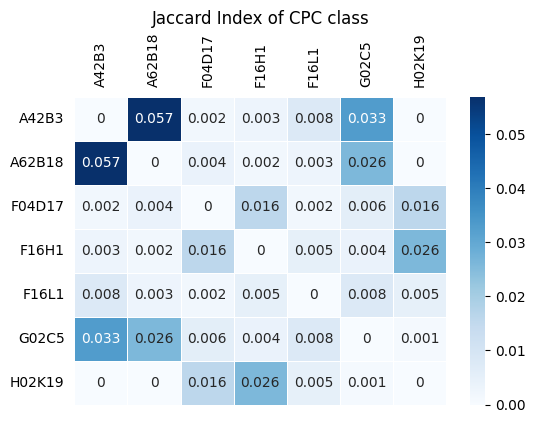

In [7]:
# Creating a DataFrame for visualization
keys = list(CPC_of_citations.keys())
matrix = pd.DataFrame(np.zeros((len(keys), len(keys))), index=keys, columns=keys)

# Fill in the matrix with the common elements counts
for (key1, key2), count in jaccard_result.items():
    matrix.loc[key1, key2] = count
    matrix.loc[key2, key1] = count  # Symmetry for pairs

# Plot the matrix using a heatmap
plt.figure(figsize=(6, 4))
ax = sns.heatmap(matrix, annot=True, cmap="Blues", linewidths=0.5, cbar=True)
ax.xaxis.tick_top() # Move the x-axis tick labels to the top
ax.tick_params(left=False, bottom=False, top=False)
plt.title('Jaccard Index of CPC class')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed for better readability
plt.show()

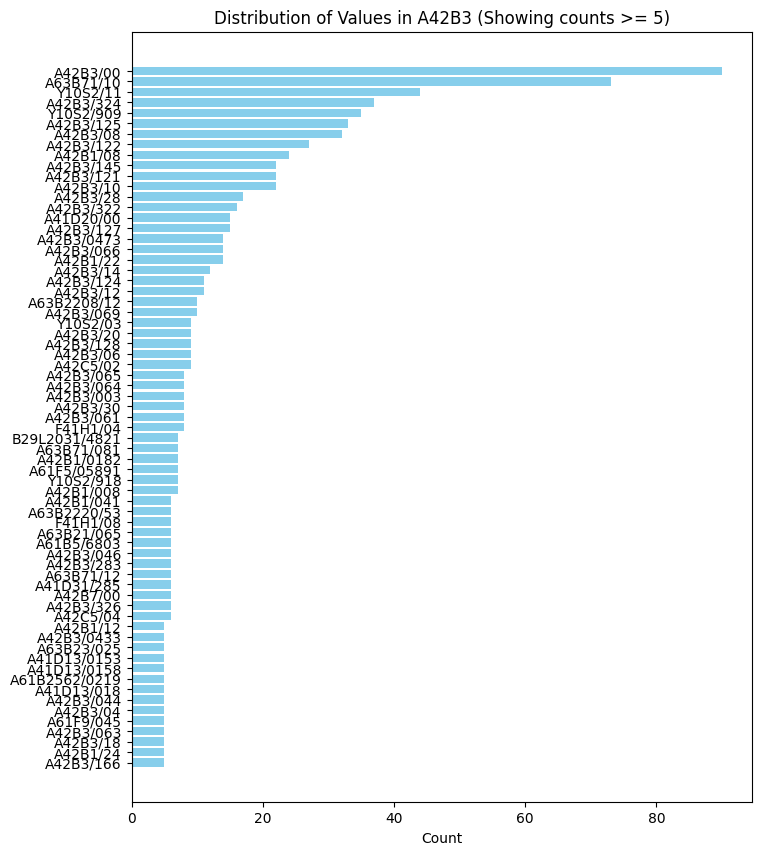

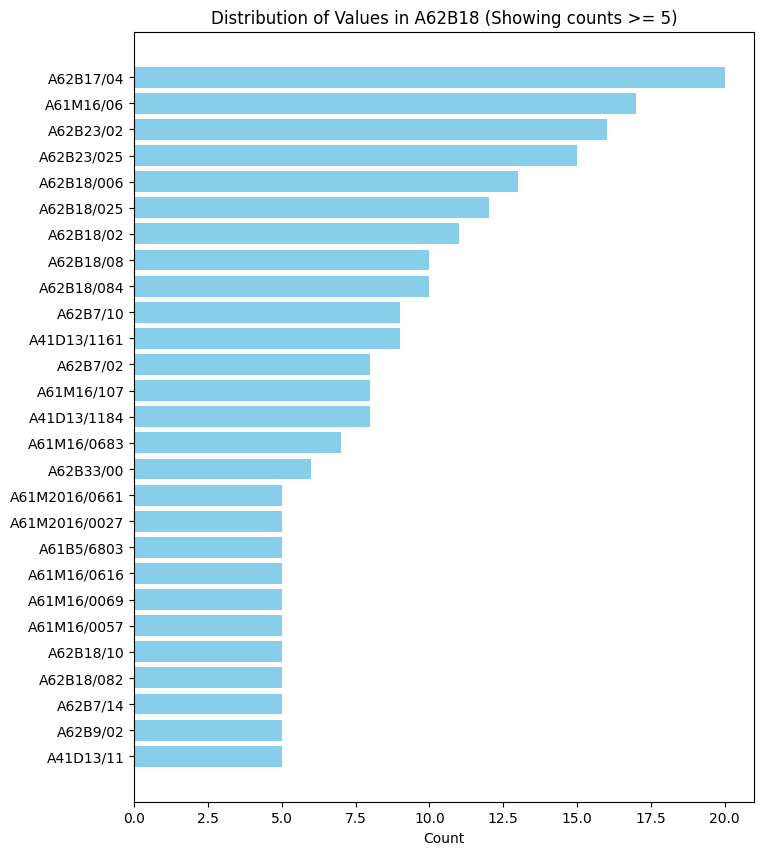

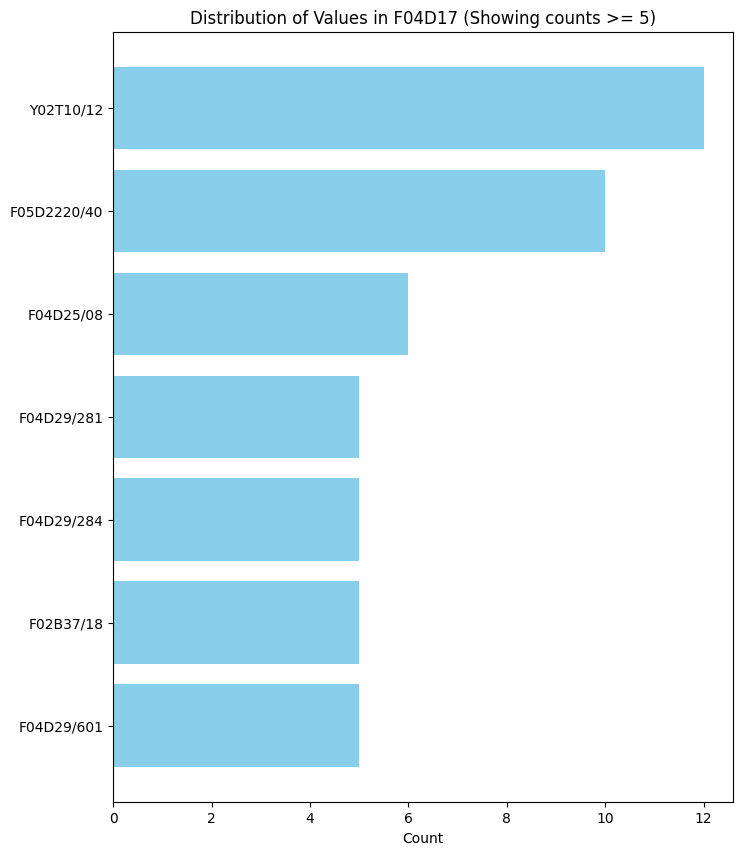

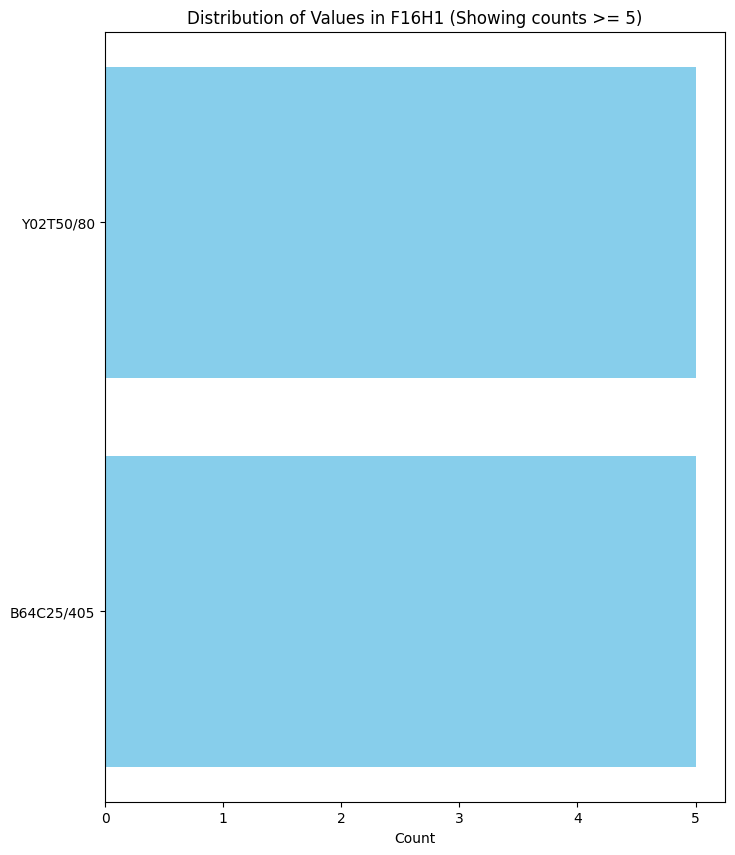

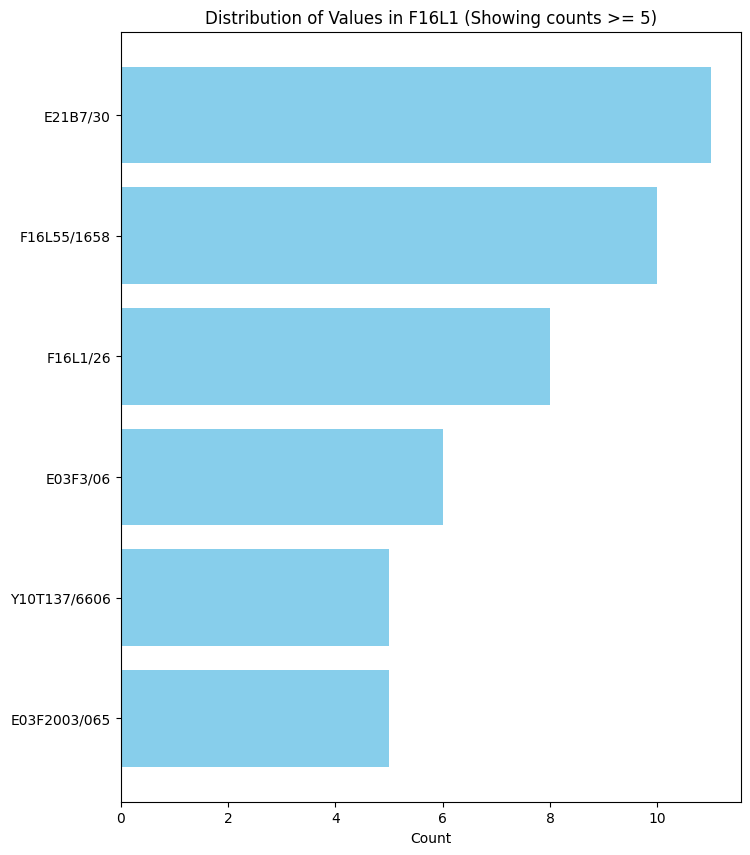

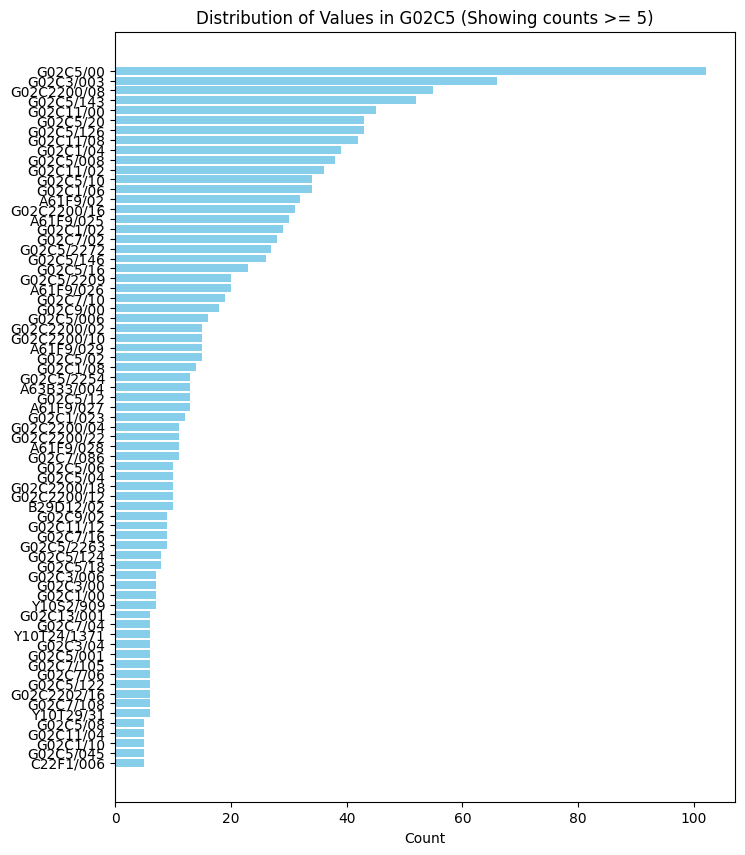

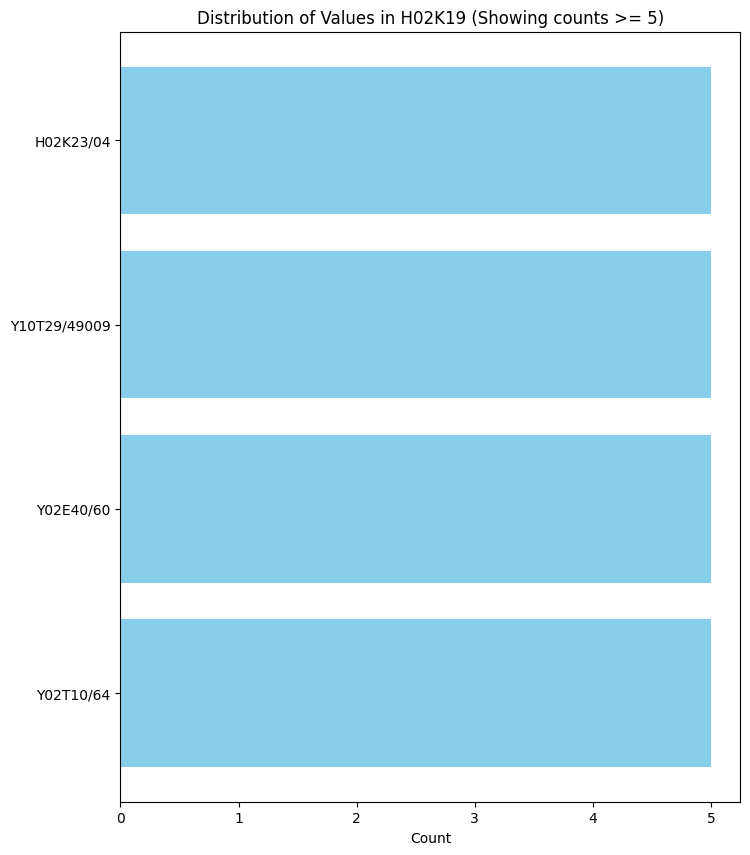

In [8]:
# Loop through each key in the dictionary to plot a bar chart for each list
for category, values in CPC_of_citations.items():
    threshold = 5
    # Count the occurrences of each unique item in the list
    counts = Counter(values) 
    # Filter items based on the threshold and sort by frequency in ascending order
    filtered_counts = {item: count for item, count in sorted(counts.items(), key=lambda x: x[1]) if count >= threshold}
    
    # Plotting
    plt.figure(figsize=(8, 10))
    plt.barh(list(filtered_counts.keys()), list(filtered_counts.values()), color='skyblue')
    plt.title(f'Distribution of Values in {category} (Showing counts >= {threshold})')
    plt.xlabel('Count')
    plt.ylabel('')
    plt.show()